In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yfinance as yf

In [15]:
tickers = ['PG', 'MSFT' , 'F' , 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = yf.download(t, start ='1995-1-1', end = '2020-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [16]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6294 entries, 1995-01-03 to 2019-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6294 non-null   float64
 1   MSFT    6294 non-null   float64
 2   F       6294 non-null   float64
 3   GE      6294 non-null   float64
dtypes: float64(4)
memory usage: 245.9 KB


In [17]:
mydata.head()


,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.529933,2.323633,3.674594,20.297829
1995-01-04,7.469573,2.340524,3.773461,20.297829
1995-01-05,7.363943,2.301916,3.740504,20.347580
1995-01-06,7.379034,2.340524,3.740504,20.248079
1995-01-09,7.348851,2.326046,3.806415,20.049086


In [18]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-12-24,112.001183,151.104889,7.811657,54.815945
2019-12-26,112.001183,152.343414,7.795159,55.011890
2019-12-27,112.779320,152.621887,7.720920,54.766953
2019-12-30,111.330338,151.306458,7.630184,54.277084
2019-12-31,111.714951,151.412094,7.671427,54.668980


In [19]:
#adjusted close data, now we can see the RR based on date and close data
#NOW NORMALIZTION (multiply by 100 fopr visuals sake)

In [20]:
mydata.iloc[0]
mydata.loc['1995-01-03']

PG       7.529933
MSFT     2.323633
F        3.674594
GE      20.297829
Name: 1995-01-03 00:00:00, dtype: float64

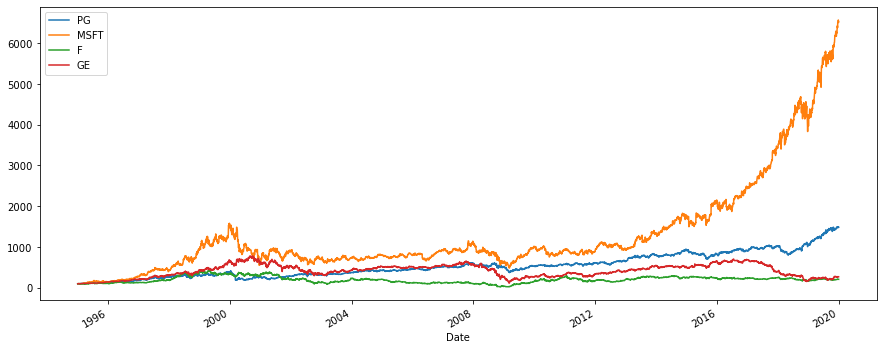

In [21]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));

In [23]:
# we need to normalize because companies may begin at different start prices why we are at 100

#you can see the 2008 crash


## Calculating the return of a portfolio of securities


In [24]:
returns = (mydata / mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [25]:
weights = np.array([0.25,0.25,0.25, 0.25]) #25% splits in a portfolio

# np.dot - matrix and vector products

In [27]:
np.dot(returns, weights)

array([        nan,  0.00653965, -0.00922986, ..., -0.00130018,
       -0.01054086,  0.0041946 ])

In [29]:
#250 trading days
annual_returns = returns.mean() * 250
print(annual_returns)

PG      0.131714
MSFT    0.214099
F       0.105705
GE      0.084725
dtype: float64


In [30]:
np.dot(annual_returns, weights)

0.1340607428113928

In [33]:
pfolio1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print(pfolio1)

13.406%



# What if the weights of your pie were different?


In [36]:
weights_2 = np.array([0.4, 0.4 , 0.15 , 0.05])

In [38]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
print(pfolio_2)

15.842%
